# Introducción a la Programación en MATLAB (C12)

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

Agosto 2017

## Contenidos

- [Aplicaciones III](#12.-Aplicaciones-III)
    - [Linealización de una Función](#12.1-Linealización-de-una-Función)
    - [Esperanza Matemática](#12.2-Esperanza-Matemática)
    - [Duopolio de Cournot](#12.3-Modelo-de-Duopolio-de-Cournot)
    - [Estimación por Máximo Verosimilitud](#12.4-Estimación-por-Máximo-Verosimilitud)
    - [El Problema de Maximización del Consumidor](#12.5-El-Problema-de-Maximización-del-Consumidor)
    

## 12. Aplicaciones III

### 12.1 Linealización de una Función

Calculemos la aproximación de Taylor de primer orden de la función $$f (x, y) = xe^{-x^2-y^2}$$ alrededor del punto (1,1), esto es: $$f(x,y) ≈ f(1,1)+fx(1,1)(x−1)+fy(1,1)(y−1)$$

El ejercicio consisten entonces en evaluar la función en el punto de aproximación f(1,1) y encontrar las derivadas parciales con respecto a x e y, y evaluarlas también en el punto de aproximación: $f_x(1,1)$ y $f_y(1,1)$.

El primer paso es definir la función:

In [1]:
clear all;
fxy = @(x) x(1)*exp(-x(1)^2-x(2)^2)

fxy =

  function_handle with value:

    @(x)x(1)*exp(-x(1)^2-x(2)^2)


Evaluamos la función en el punto $(1,1)$ y calculamos las derivadas parciales evaluada en ese mismo punto:

In [2]:
fc = fxy([1; 1])
df = fdjac(fxy,[1; 1])
fx = df(1)
fy = df(2)

fxyaprox = @(x) fc - fx - fy + fx*x(1) + fy*x(2)

fc =

    0.1353


df =

   -0.1353   -0.2707


fx =

   -0.1353


fy =

   -0.2707


fxyaprox =

  function_handle with value:

    @(x)fc-fx-fy+fx*x(1)+fy*x(2)


In [3]:
x=[1; 2];
fxy(x)
fxyaprox(x)

ans =

    0.0067


ans =

   -0.1353


Así luce la aproximación:

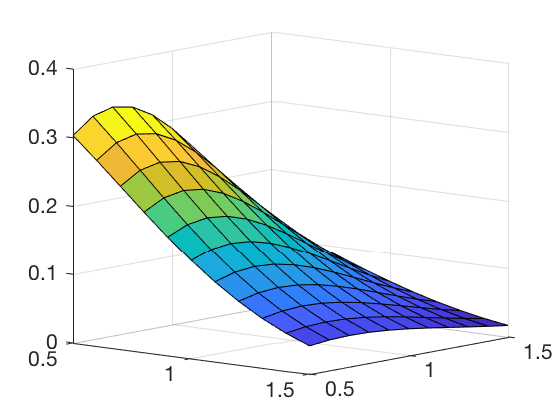

In [4]:
x = 0.5:0.1:1.5;
n = length(x);

forig = zeros(n,n);
faprox = zeros(n,n);
X = zeros(n,n);

for i = 1:n;
    for j=1:n;
        forig(i,j) = fxy([x(i);x(j)]);
        faprox(i,j) = fxyaprox([x(i);x(j)]);
        X(i,j) = x(j);
    end;
end;

surf(x,x,forig);
view(40, 10); 

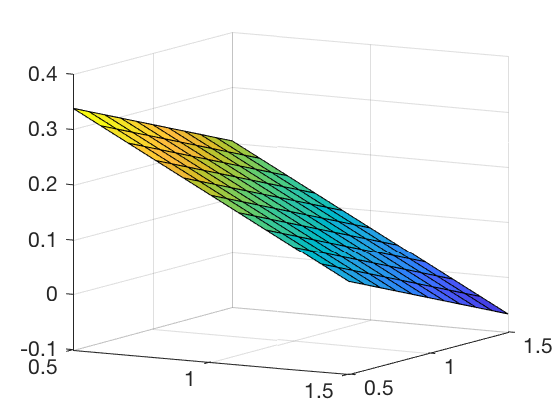

In [5]:
surf(x,x,faprox);
view(30, 10);

### 12.2 Esperanza Matemática

Calculemos la esperanza matemática de una variable aleatoria normal $x$: $$E(x) = \int^{\infty}_{-\infty} x f(x)dx$$ donde $f(x)$ es la función de densidad normal. Para esto escribimos la función en un m-file recordando que:

$$f(x) = \frac{1}{\sigma \sqrt {2\pi}}e^{- \frac{\left( x - \mu  \right)^2}{2 \sigma^2} }$$

Note: Matlab tiene la densidad normal incorporada en el toolbox de estadísticas pero dejaremos esto para más adelante.

```
funtion int = integrando(x,mu,sigma)

fx = (1./(sigma*sqrt(2*pi))).*exp(-(x-mu).^2./(2*sigma^2));

int = x.*fx;

end
```

In [6]:
Ex = integral(@(x) integrando(x,3,2),-Inf,Inf)

Ex =

    3.0000


In [7]:
intf = @(x,mu,sigma) x.*normpdf(x,mu,sigma)
integral(@(x) intf(x,3,2),-Inf,Inf)

intf =

  function_handle with value:

    @(x,mu,sigma)x.*normpdf(x,mu,sigma)


ans =

    3.0000


Usando la misma lógica calculemos $E(x^2)$:

In [8]:
Ex2 = integral(@(x) integrando2(x,3,2),-Inf,Inf)

Ex2 =

   13.0000


Finalmente, usemos los dos resultados anteriores para calcular la varianza. Para ello recordemos que $$V(x) = E(x^2) - (E(x))^2$$

In [9]:
Vx = Ex2 - Ex^2

Vx =

    4.0000


### 12.3 Modelo de Duopolio de Cournot

*Aplicación tomada de Miranda y Fackler (2002), Capítulo 3.*

Suponga que la demanda de mercado es provista por dos empresas 1 y 2. La función de demanda es:

$$P(q) = q^{1/\eta}$$

con $q=q_1+q_2$. Laq función de costos de la empresa $i=1,2$ es:

$$C_i(q_i) = 0.5c_iq^2_i$$

Con esto es posible escribir la función de beneficios de la empresa $i$ como:

$$\pi(q_1,q_2) = P(q_1+q_2)q_i - C_i(q_i)$$

Reemplazando tenemos:

$$\pi(q_1,q_2) = (q_1+q_2)^{1/\eta}q_i - 0.5c_iq^2_i$$

Cada firma busca maximizar su beneficio eligiendo la cantidad que produce y tomando como dada la decisión de la otra empresa.

Las condiciones de primer orden son:

$$(q_1+q_2)^{-1/\eta} - (1/\eta)(q_1+q_2)^{-1/\eta-1} - c_iq_i = 0, \ \ \ i=1,2$$

Note que el equilibrio está caracterizado por la solución del sistema de dos ecuaciones no lineales anterior.

Para resolver el modelo escribimos la siguiente función en un m-file:

```
function fval = cournot(q,c,eta)

neq = length(q);
fval = zeros(neq,1);

q1 = q(1);
q2 = q(2);

c1 = c(1);
c2 = c(2);

fval(1) = (q1+q2)^(-1/eta) - (1/eta)*((q1+q2)^(-(1/eta)-1))*q1 - c1*q1;
fval(2) = (q1+q2)^(-1/eta) - (1/eta)*((q1+q2)^(-(1/eta)-1))*q2 - c2*q2;

end
```

Definimos los parámetros:

In [10]:
clear all;
c = [0.6; 0.6];
eta = 1.2;

Usamos `fsolve` para encontrar la solución:

In [11]:
q0 = [0.2; 0.2];
qstar = fsolve(@(x) cournot(x,c,eta),q0)

Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the default value of the function tolerance, and
the problem appears regular as measured by the gradient.




qstar =

    0.7186
    0.7186


La idea de escribir la función dejando `c` y `eta` como inputs permite simular la solución bajo distintos niveles de costos y de la elasticidad de la demanda.

### 12.4 Estimación por Máximo Verosimilitud 

Suponga que buscamos estimar el siguiente modelo de regresión lineal:

$$y_i = \beta_0 + \beta_1 x_{1i}+ \beta_2 x_{2i} + u_i$$

por el método de máximo verosimilitud. Para ello suponemos que:

$$u_i \sim N(0,\sigma^2)$$ 

Usaremos los datos que generamos para la aplicación sobre MCO.

In [12]:
clear all;
warning('off');
impdata = importdata('DatosMCO.txt');
[N, K]= size(impdata);
y = impdata(:,1);
X1 = impdata(:,2);
X2 = impdata(:,3);

X = [X1 X2];

La función de verosimilitud se define como:

$$L(y,x1,x2|\beta_0,\beta_1,\beta_2,\sigma) = \prod^n_{i=1} f(u_i)$$

donde $f(u_i)$ es la función de densidad normal. Tomando logaritmos:

$$\ln L(y,x1,x2|\beta_0,\beta_1,\beta_2,\sigma) = \sum^n_{i=1} \ln f(u_i)$$

El objetivo es maximizar $$\ln L(y,x1,x2|\beta_0,\beta_1,\beta_2,\sigma)$$ eligiendo los parámetros $(\beta_0,\beta_1,\beta_2,\sigma)$.

El primer paso es escribir la función de verosimilitud.

Para ellos haremos uso del toolbox de estadísticas de Matlab. Dicho toolbox implementa muchas distribuciones, tanto discretas como continuas. Ahora usaremos la distribución normal.

Las opciones para usar la distribución normal son:

- `normpdf(x,mu,sigma)`: Función de densidad.
- `normcdf(x,mu,sigma)`: Función de Distribución Acumulada
- `norminv(Prob,mu,sigma)`: Inversa de la Función de Distribución Acumulada.
- `normrnd(mu,sigma)`: Generados de números aleatorios.

La lista de distribuciones que Matlab tiene implementadas puede verse [aquí](http://www.mathworks.com/help/stats/supported-distributions.html). En general la sintaxis es `distpdf`, `distcdf`, `distinv`, `distrnd` con `dist` el identificador de la distribución.

```
function lnL = loglike(par,y,X)

beta0 = par(1);
beta1 = par(2);
beta2 = par(3);
sig   = exp(par(4));

N = length(y);

L = zeros(N,1);

for i=1:N
    ui = y(i) - beta0 - beta1*X(i,1) - beta2*X(i,2);
    L(i) = normpdf(ui,0,sig);
end

lnL = -sum(log(L));

end
```

Maximizamos la función de verosimilitud:

In [13]:
par0 = [2 0.1 0.1 log(2)];
par = fminunc(@(x) loglike(x,y,X),par0);
disp(par)

Local minimum found.

Optimization completed because the size of the gradient is less than
the default value of the optimality tolerance.



    2.9913    0.5640    0.8020   -0.0170


Recordemos que los datos fueron generados bajo el siguiente modelo:

$$y_i = 3 + 0.5X_{1i} + 0.9X_{2i} + u_i$$

donde $u_i \sim N(0,1)$.

Finalmente, la desviación estándar será: 

In [14]:
sig = exp(par(4))

sig =

    0.9832


### 12.5 El Problema de Maximización del Consumidor

Suponga que un consumidor busca maximizar la siguiente función de utilidad:

$$U(x_1,x_2,...,x_n) = \sum^{n}_{i=1}x^{\alpha_i}_i$$

con $\sum^{n}_{i=1}\alpha_i = 1$. Sujeto a la restricción presupuestaria:

$$p_1x_1 + p_2x_2 + ... + p_nx_n \leq m$$ 

y las restricciones de no negatividad:

$$x_i \geq 0 $$

con $m$ es ingreso y $p_i$ el precio del bien $i$.

Escribimos una función en un m-file que tome un número arbitrario de bienes.

```
function u = utility(x,alpha)

u = - sum(x.^alpha)

end
```

Note que definimos la función de utilidad como negativa para maximizar (recuerde que `fmincon` minimiza).

Maximicemos la utilidad bajo el supuesto que existen 4 bienes. 

Definimos los parámetros del modelo:

In [15]:
clear all;
alpha = [0.2 0.4 0.1 0.3]';
p = [2 3 4 5];
m = 100;

Ahora definimos los parámetros de optimización:

In [16]:
AI = p;
bI = m;
lb = [0 0 0 0]';
ub = [Inf Inf Inf Inf]';

Optimizamos:

In [17]:
x0 = [1 1 1 1]';
x = fmincon(@(x) utility(x,alpha),x0,AI,bI,[],[],lb,ub);
disp(x);

Local minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the default value of the optimality tolerance,
and constraints are satisfied to within the default value of the constraint tolerance.



    6.6759
   20.3037
    1.1586
    4.2205


In [18]:
p*x

ans =

  100.0000
